In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
len(tf.config.list_physical_devices('GPU'))

1

In [5]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)
            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                #print(img.shape)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    img = cv2.resize(img, (196, 196))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [6]:
image_train_set = import_maps(r'C:\Users\ILBS_14_8_21_Sanjeev\TJK\Train')
image_test_set = import_maps(r'C:\Users\ILBS_14_8_21_Sanjeev\TJK\Test')

In [7]:
len(image_train_set)

15205

In [8]:
len(image_test_set)

2610

In [9]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [10]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [11]:
train_images_array.shape

(15205, 196, 196)

In [12]:
(12900-11250)/150

11.0

In [13]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(15205, 196*196))
train_images_array = train_images.reshape(15205, 196, 196, 1)

In [14]:
train_image_label.shape

(15205,)

In [15]:
test_images_array.shape

(2610, 196, 196, 1)

In [16]:
test_image_label.shape

(2610,)

In [17]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [18]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [19]:
val_x.shape

(3041, 196, 196, 1)

In [20]:
train_y.shape

(12164,)

In [21]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Conv2D(input_shape=(196,196,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",kernel_regularizer= keras.regularizers.l2(0.00001)))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_regularizer= keras.regularizers.l2(0.0001)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='fc1'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax', name='output'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(0.01),
               metrics=['accuracy'])

model.summary()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=10, min_lr=0.000001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 49, 49, 256)       2

In [22]:
##Previous model Run for 200 epoch

In [23]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=10, verbose=1,shuffle=True, callbacks = [reduce_lr])

Epoch 1/10
381/381 [==============================] - 171s 198ms/step - loss: 0.9914 - accuracy: 0.6098 - val_loss: 0.9595 - val_accuracy: 0.6146ccuracy: 0.6 - ETA: 54s -  - ETA: 18s - loss: 1.0040 - accuracy: 0 - ETA: 17s - loss: 1.0035 - ac -  - ETA: 4s - loss: 0.9927 -  -
Epoch 2/10
381/381 [==============================] - 71s 188ms/step - loss: 0.9466 - accuracy: 0.6162 - val_loss: 1.0272 - val_accuracy: 0.5031- loss: 0.9670 - acc - ETA: 55s - loss: 0.9613 - accuracy: - ETA: 53s - loss: 0 - ETA: 41s  - ETA: 36s - loss: 0.9603 - accuracy: 0. - ETA: 35s - loss: 0.9617 - accuracy: 0. - ETA: 34s -  - ETA: 29s - loss: 0.9594 - a - ETA: 26s - loss: 0.95 - ETA: 23s - loss:  - ETA: 18s - loss: 0.9530 - ETA: 15s - loss: 0.9532 -  - E
Epoch 3/10
381/381 [==============================] - 71s 188ms/step - loss: 0.8545 - accuracy: 0.6765 - val_loss: 1.0790 - val_accuracy: 0.614667 - accuracy - ETA: 1s - loss: 0.8552 - ac
Epoch 4/10
381/381 [==============================] - 72s 188ms/step - 

In [24]:
test_image = scalar.fit_transform(test_images_array.reshape(2610,196*196))
test_image_array = test_image.reshape(2610,196,196,1)

In [25]:
score = model.evaluate(test_image_array,test_label_enc)

82/82 [==============================] - 6s 74ms/step - loss: 4.1455 - accuracy: 0.5525


In [26]:
score = model.evaluate(train_x,train_label_enc)

KeyboardInterrupt: 

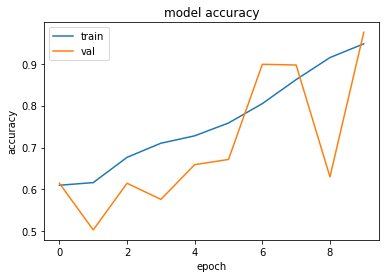

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

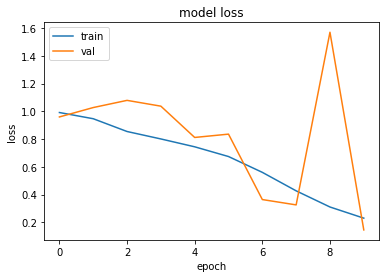

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')                                          
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
y_predict = model.predict(test_image_array)

In [30]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [31]:
from sklearn.metrics import confusion_matrix,precision_score,auc,recall_score,roc_curve,precision_recall_curve

In [32]:
confusion_matrix(test_image_label,y_predict_bool)

array([[450,  17, 343],
       [201,   0,  99],
       [490,  18, 992]], dtype=int64)

In [31]:
67/(67+36+18+29)

0.44666666666666666

In [33]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.5199668661947585

In [34]:
recall_score(test_image_label,y_predict_bool,average='weighted')

0.5524904214559387

In [35]:
from sklearn.metrics import *

In [36]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46       810
           1       0.00      0.00      0.00       300
           2       0.69      0.66      0.68      1500

    accuracy                           0.55      2610
   macro avg       0.36      0.41      0.38      2610
weighted avg       0.52      0.55      0.53      2610



In [39]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=2)
print(auc(fpr,tpr))

0.6325849849849849


In [ ]:
thresholds

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(196,196,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 194, 194, 32)      320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 192, 192, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 96, 96, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 589824)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               75497600  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 75,516,803
Trainable params: 75,516,803
Non-trainable params: 0
__________________________________________

In [41]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=10, verbose=1,shuffle=True)

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[589824,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential_1/dense/MatMul_1 (defined at <ipython-input-41-248eeca9be22>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_12774]

Function call stack:
train_function
